In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import mdtraj as md
import pickle
from tqdm import tqdm
import itertools
from deeptime.decomposition import TICA

In [3]:
actual_trajectory = np.load('backup_train_test/y_test.pkl.npy', mmap_mode = None, allow_pickle = False, fix_imports=True,encoding='ASCII')
Predicted_trajectory = np.load('backup_train_test/Test_predict.pkl.npy', mmap_mode = None, allow_pickle = False, fix_imports = True, encoding = 'ASCII')

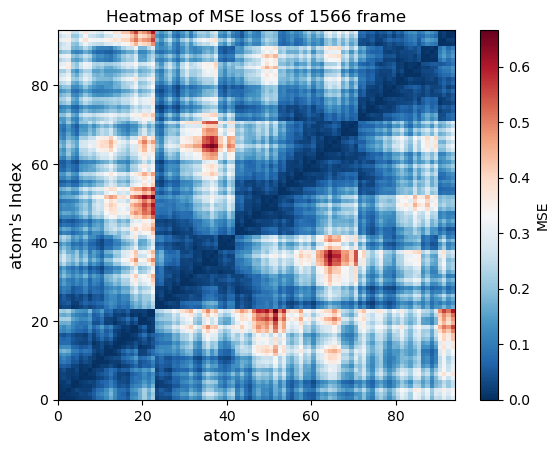

In [6]:
idx = 1566

actual_frame = actual_trajectory[idx]
predicted_frame = actual_trajectory[idx]

#mse_frame = np.mean((actual_frame - predicted_frame) ** 2, axis=1)  

similarity_matrix = np.zeros((94, 94))
for i in range(94):
    for j in range(94):
        mse = np.mean(np.square(actual_frame[i] - predicted_frame[j]))
        similarity_matrix[i,j] = mse
        if i != j:
                similarity_matrix[j, i] = mse

cmap = plt.cm.RdBu_r
fig, ax = plt.subplots()
heatmap = ax.pcolormesh(similarity_matrix, cmap = cmap)
fig.colorbar(heatmap, label="MSE")
plt.title("Heatmap of MSE loss of {} frame".format(idx))
plt.xlabel("atom's Index",fontsize = 12)
plt.ylabel("atom's Index", fontsize = 12)
#plt.savefig('plots/Heatmap of MSE loss for frame 1000.png', dpi = 400)
plt.show()

In [8]:
actual_actual = np.diag(similarity_matrix)
actual_actual

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

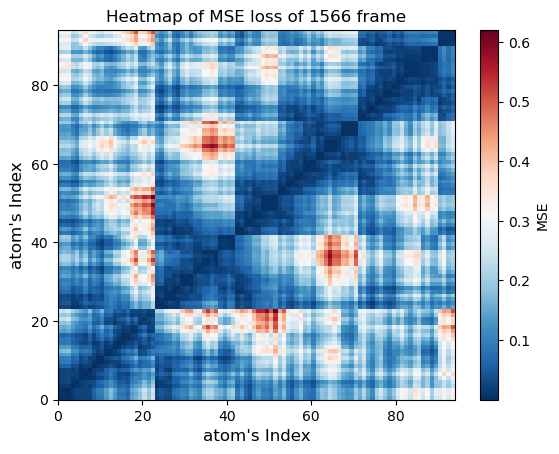

In [10]:
idx = 1566

actual_frame = actual_trajectory[idx]
predicted_frame = Predicted_trajectory[idx]

#mse_frame = np.mean((actual_frame - predicted_frame) ** 2, axis=1)  

similarity_matrix = np.zeros((94, 94))
for i in range(94):
    for j in range(94):
        mse = np.mean(np.square(actual_frame[i] - predicted_frame[j]))
        similarity_matrix[i,j] = mse
        if i != j:
                similarity_matrix[j, i] = mse

cmap = plt.cm.RdBu_r
fig, ax = plt.subplots()
heatmap = ax.pcolormesh(similarity_matrix, cmap = cmap)
fig.colorbar(heatmap, label="MSE")
plt.title("Heatmap of MSE loss of {} frame".format(idx))
plt.xlabel("atom's Index",fontsize = 12)
plt.ylabel("atom's Index", fontsize = 12)
#plt.savefig('plots/Heatmap of MSE loss for frame 1000.png', dpi = 400)
plt.show()

In [12]:
actual_predicted = np.sqrt(np.diag(similarity_matrix)) 
actual_predicted

array([0.04405055, 0.07947862, 0.03748121, 0.03531637, 0.04487336,
       0.02529851, 0.01311074, 0.01776809, 0.03102899, 0.03447681,
       0.03551304, 0.04849036, 0.05240671, 0.06668596, 0.04899224,
       0.06008453, 0.04243811, 0.08477925, 0.0996122 , 0.09647514,
       0.11931731, 0.10979217, 0.13864961, 0.03394984, 0.03009859,
       0.03242145, 0.0326261 , 0.03953081, 0.04010539, 0.04984375,
       0.04242354, 0.03221728, 0.05904819, 0.06744462, 0.07603553,
       0.07024102, 0.13941366, 0.07766895, 0.05620495, 0.12079635,
       0.10314525, 0.05698371, 0.03834945, 0.02878779, 0.02581066,
       0.03763306, 0.0148236 , 0.01587233, 0.0196977 , 0.04382384,
       0.0669836 , 0.06330785, 0.00567433, 0.00834955, 0.01039438,
       0.01902745, 0.00900461, 0.00969907, 0.01282913, 0.01381951,
       0.01619694, 0.01168476, 0.03544076, 0.04943814, 0.06902136,
       0.03595057, 0.10823661, 0.01920042, 0.04751506, 0.07797009,
       0.09507068, 0.01157887, 0.01913156, 0.00540749, 0.01618

In [24]:
act_1566 = md.load('PDB/test_label_1566.pdb')
pre_1566 = md.load('PDB/test_predicted_1566.pdb')

In [26]:
act_1566

<mdtraj.Trajectory with 1 frames, 94 atoms, 5 residues, and unitcells at 0x14f37852e10>

In [28]:
pre_1566

<mdtraj.Trajectory with 1 frames, 94 atoms, 5 residues, and unitcells at 0x14f363d74a0>

In [30]:
#aligned_target_traj = pre_1566.superpose(act_1566)

In [32]:
RMSD = md.rmsd(act_1566,pre_1566)

In [34]:
RMSD

array([0.09171019], dtype=float32)

In [36]:
idx = 1566

actual_frame = actual_trajectory[idx]
predicted_frame = Predicted_trajectory[idx]


In [38]:
RMSD = np.sqrt(np.mean((actual_frame - predicted_frame)**2))

In [40]:
np.mean(RMSD)

0.05719078

In [42]:
actual_xyz = act_1566.xyz

In [44]:
predicted_xyz = pre_1566.xyz

In [46]:
RMSD1 = np.sqrt(np.mean((actual_xyz - predicted_xyz)**2))

In [48]:
RMSD1

0.053418405

In [50]:
aligned_target_traj = pre_1566.superpose(act_1566)

In [52]:
RMSE1 = md.rmsd(act_1566,aligned_target_traj)
RMSE1

array([0.0917104], dtype=float32)